In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime as dt
import re
import pickle
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset = pd.read_csv("/content/drive/My Drive/MLSpring2020/AIInsight_CrunchbasePrediction/Datasets/crunchbase/crunchbase_new_scraped_data.csv",encoding= 'unicode_escape')

In [0]:
dataset.head()

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Organization),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,Founded Date Precision,Exit Date,Exit Date Precision,Closed Date,Closed Date Precision,Company Type,Website,Number of Articles,Full Description,Investor Type,Investment Stage,Number of Portfolio Organizations,Number of Investments,Number of Lead Investments,Number of Exits,Number of Exits (IPO),Accelerator Program Type,Accelerator Duration (in weeks),Industry Groups,Number of Founders,Founders,Number of Employees,Number of Funding Rounds,Funding Status,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Funding Type,Last Equity Funding Amount,...,Number of Lead Investors,Top 5 Investors,Number of Acquisitions,Acquisition Status,Acquired by,Acquired by URL,Acquisition Type,Acquisition Terms,Price,Price Currency,Price Currency (in USD),IPO Status,IPO Date,Delisted Date,Delisted Date Precision,Money Raised at IPO,Money Raised at IPO Currency,Money Raised at IPO Currency (in USD),Valuation at IPO,Valuation at IPO Currency,Valuation at IPO Currency (in USD),Stock Symbol,Stock Symbol URL,Stock Exchange,Trend Score (7 Days),Trend Score (30 Days),Trend Score (90 Days),SimilarWeb - Monthly Visits,SimilarWeb - Average Visits (6 months),SimilarWeb - Monthly Rank Change (#),SimilarWeb - Monthly Rank Growth,BuiltWith - Active Tech Count,Apptopia - Number of Apps,Apptopia - Downloads Last 30 Days,Siftery - Total Products Active,IPqwery - Patents Granted,IPqwery - Trademarks Registered,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD)
0,'nuffsaid,https://www.crunchbase.com/organization/nuffsaid,NaN,"Palo Alto, California, United States",A smart space for your work apps,"4,387","San Francisco Bay Area, Silicon Valley, West C...",NaN,Active,5/29/19,day,NaN,NaN,NaN,NaN,For Profit,https://www.nuffsaid.com/,NaN,ânuffsaid is a workflow intelligence platfor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"Chris Hicken, Hariharan Rajagopalan, Nick Para...",Nov-50,1,Seed,2/11/20,4300000.0,USD,4300000.0,Seed,4300000.0,...,2.0,"General Catalyst, Gradient Ventures, Global Fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.8,1.2,10.0,"11,674","4,406.64","44,034",2.76%,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/dev/color,https://www.crunchbase.com/organization/dev-color,"Information Technology, Non Profit, Software","Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"68,577","San Francisco Bay Area, Silicon Valley, West C...",$1M to $10M,Active,5/1/15,month,NaN,NaN,NaN,NaN,For Profit,http://www.devcolor.org/,NaN,/dev/color is a non-profit organization that a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information Technology, Software",1.0,Makinde Adeagbo,10-Jan,1,Seed,8/24/16,120000.0,USD,120000.0,Seed,120000.0,...,NaN,Y Combinator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,-0.3,-0.3,"7,266","25,482.11","-154,302",-7.76%,40.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN
2,0Chain,https://www.crunchbase.com/organization/0chain,"Blockchain, Cyber Security, Data Storage","San Jose, California, United States",0Chain is a blockchain-secure data protection ...,"19,974","San Francisco Bay Area, Silicon Valley, West C...",NaN,Active,7/1/17,month,NaN,NaN,NaN,NaN,For Profit,https://0chain.net,NaN,0Chain is a blockchain-secure data protection ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hardware, Information Technology, Privacy and ...",1.0,Saswata Basu,10-Jan,3,Seed,1/21/20,NaN,NaN,NaN,Seed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,-0.9,2.5,"1,679","1,485.31","-5,666,099",-50.48%,8.0,NaN,NaN,NaN,0.0,6.0,NaN,NaN,NaN
3,100AM,https://www.crunchbase.com/organization/100and...,"Apps, Business Information Sys

**Visualizing Missing Values and dropping them**

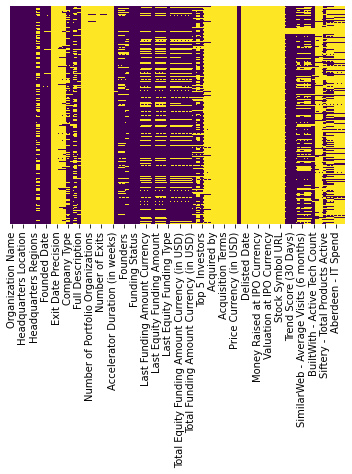

In [0]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [0]:
dataset.drop(['Aberdeen - IT Spend'], axis=1, inplace = True)

In [0]:
dataset.drop(['Aberdeen - IT Spend Currency'], axis=1, inplace = True)

In [0]:
dataset.drop(['Aberdeen - IT Spend Currency (in USD)'], axis=1, inplace = True)

In [0]:
dataset.drop(['IPqwery - Trademarks Registered'], axis=1, inplace = True)

In [0]:
dataset.drop(['Siftery - Total Products Active'], axis=1, inplace = True)

In [0]:
dataset.drop(['Apptopia - Downloads Last 30 Days'], axis=1, inplace = True)

In [0]:
dataset.drop(['Website'], axis=1, inplace = True)

In [0]:
dataset.drop(['Closed Date Precision'], axis=1, inplace = True)

In [0]:
dataset.drop(['Number of Portfolio Organizations'], axis=1, inplace = True)

In [0]:
dataset.drop(['Number of Investments'], axis=1, inplace = True)

In [0]:
dataset.drop(['Number of Lead Investments'], axis=1, inplace = True)

In [0]:
dataset.drop(['Number of Exits'], axis=1, inplace = True)

In [0]:
dataset.drop(['Number of Exits (IPO)'], axis=1, inplace = True)

In [0]:
dataset.drop(['Accelerator Program Type'], axis=1, inplace = True)

In [0]:
dataset.drop(['Founders'], axis=1, inplace = True)

In [0]:
dataset.drop(['Last Funding Type'], axis=1, inplace = True)

In [0]:
dataset.drop(['Stock Symbol'], axis=1, inplace = True)

In [0]:
dataset.drop(['Stock Symbol URL'], axis=1, inplace = True)

In [0]:
dataset.drop(['Money Raised at IPO Currency'], axis=1, inplace = True)

In [0]:
dataset.drop(['Headquarters Regions'], axis=1, inplace = True)

In [0]:
dataset.drop(['Apptopia - Number of Apps'], axis=1, inplace = True)

In [0]:
dataset.drop(['Acquired by URL'], axis=1, inplace = True)

In [0]:
dataset.drop(['Acquisition Terms'], axis=1, inplace = True)

In [0]:
dataset.drop(['Price'], axis=1, inplace = True)

In [0]:
dataset.drop(['Price Currency'], axis=1, inplace = True)

In [0]:
dataset.drop(['Accelerator Duration (in weeks)'], axis=1, inplace = True)

In [0]:
dataset.drop(['Valuation at IPO'], axis=1, inplace = True)

In [0]:
dataset.drop(['Valuation at IPO Currency'], axis=1, inplace = True)

In [0]:
dataset.drop(['Valuation at IPO Currency (in USD)'], axis=1, inplace = True)

In [0]:
dataset.drop(['Delisted Date Precision'], axis=1, inplace = True)

In [0]:
dataset.drop(['Acquisition Type'], axis=1, inplace = True)

In [0]:
dataset.drop(['Money Raised at IPO Currency (in USD)'], axis=1, inplace = True)

In [0]:
dataset.drop(['Investor Type'], axis=1, inplace = True)

In [0]:
dataset.drop(['Investment Stage'], axis=1, inplace = True)

In [0]:
dataset.drop(['Delisted Date'], axis=1, inplace = True)

In [0]:
dataset.drop(['Acquired by'], axis=1, inplace = True)

In [0]:
dataset.drop(['Price Currency (in USD)'], axis=1, inplace = True)

In [0]:
dataset.drop(['Exit Date'], axis=1, inplace = True)

In [0]:
dataset.drop(['Exit Date Precision'], axis=1, inplace = True)

In [0]:
dataset.drop(['Money Raised at IPO'], axis=1, inplace = True)

In [0]:
dataset.drop(['Stock Exchange'], axis=1, inplace = True)

In [0]:
dataset.drop(['IPO Date'], axis=1, inplace = True)

In [0]:
pd.set_option('display.max_columns', None)

In [0]:
dataset.head()

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Organization),Estimated Revenue Range,Operating Status,Founded Date,Founded Date Precision,Closed Date,Company Type,Number of Articles,Full Description,Industry Groups,Number of Founders,Number of Employees,Number of Funding Rounds,Funding Status,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD),Last Equity Funding Type,Total Equity Funding Amount,Total Equity Funding Amount Currency,Total Equity Funding Amount Currency (in USD),Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Investors,Number of Lead Investors,Top 5 Investors,Number of Acquisitions,Acquisition Status,IPO Status,Trend Score (7 Days),Trend Score (30 Days),Trend Score (90 Days),SimilarWeb - Monthly Visits,SimilarWeb - Average Visits (6 months),SimilarWeb - Monthly Rank Change (#),SimilarWeb - Monthly Rank Growth,BuiltWith - Active Tech Count,IPqwery - Patents Granted
0,'nuffsaid,https://www.crunchbase.com/organization/nuffsaid,NaN,"Palo Alto, California, United States",A smart space for your work apps,"4,387",NaN,Active,5/29/19,day,NaN,For Profit,NaN,ânuffsaid is a workflow intelligence platfor...,NaN,3.0,Nov-50,1,Seed,2/11/20,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,Seed,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,6.0,2.0,"General Catalyst, Gradient Ventures, Global Fo...",NaN,NaN,Private,-0.8,1.2,10.0,"11,674","4,406.64","44,034",2.76%,25.0,NaN
1,/dev/color,https://www.crunchbase.com/organization/dev-color,"Information Technology, Non Profit, Software","Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"68,577",$1M to $10M,Active,5/1/15,month,NaN,For Profit,NaN,/dev/color is a non-profit organization that a...,"Information Technology, Software",1.0,10-Jan,1,Seed,8/24/16,120000.0,USD,120000.0,120000.0,USD,120000.0,Seed,120000.0,USD,120000.0,120000.0,USD,120000.0,1.0,NaN,Y Combinator,NaN,NaN,Private,-0.3,-0.3,-0.3,"7,266","25,482.11","-154,302",-7.76%,40.0,NaN
2,0Chain,https://www.crunchbase.com/organization/0chain,"Blockchain, Cyber Security, Data Storage","San Jose, California, United States",0Chain is a blockchain-secure data protection ...,"19,974",NaN,Active,7/1/17,month,NaN,For Profit,NaN,0Chain is a blockchain-secure data protection ...,"Hardware, Information Technology, Privacy and ...",1.0,10-Jan,3,Seed,1/21/20,NaN,NaN,NaN,NaN,NaN,NaN,Seed,5850000.0,USD,5850000.0,5850000.0,USD,5850000.0,NaN,NaN,NaN,NaN,NaN,Private,-0.1,-0.9,2.5,"1,679","1,485.31","-5,666,099",-50.48%,8.0,0.0
3,100AM,https://www.crunchbase.com/organization/100and...,"Apps, Business Information Systems, Events, In...","Redwood City, California, United States",Uber for event attendees,"49,773",NaN,Active,1/19/16,day,NaN,For Profit,NaN,100AM brings more valuable contacts = increase...,"Apps, Events, Hardware, Information Technology...",2.0,NaN,2,Seed,7/10/18,130000.0,USD,130000.0,130000.0,USD,130000.0,Pre-Seed,730000.0,USD,730000.0,730000.0,USD,730000.0,1.0,1.0,Starta Accelerator,NaN,NaN,Private,0.8,2.0,1.2,394,"1,454.91","3,423,576",36.47%,41.0,0.0
4,101 Islands LLC,https://www.crunchbase.com/organization/101-is...,"Apps, Consumer Applications, Information Techn...","San Jose, California, United States",Patented GROTU mobile app (iOS & Android) for ...,"20,127",NaN,Active,2/24/17,day,NaN,For Profit,11,GROTU - Our patented mobile app is FREE to dow...,"Apps, Information Technology, Media and Entert...",1.0,10-Jan,1,Seed,2/24/17,200000.0,USD,200000.0,200000.0,USD,200000.0,Pre-Seed,200000.0,USD,200000.0,200000.0,USD,200000.0,1.0,1.0,Sunmeet Jolly,NaN,NaN,Private,-0.4,3.0,1.4,NaN,182.84,NaN,NaN,21.0,NaN


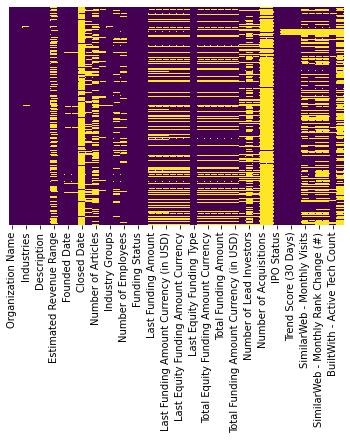

In [0]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [0]:
dataset.isna().sum()

Organization Name                                   0
Organization Name URL                               0
Industries                                        100
Headquarters Location                               0
Description                                         0
CB Rank (Organization)                              0
Estimated Revenue Range                          4745
Operating Status                                    0
Founded Date                                      278
Founded Date Precision                            278
Closed Date                                      9139
Company Type                                     2348
Number of Articles                               4010
Full Description                                  701
Industry Groups                                   122
Number of Founders                               1516
Number of Employees                              1383
Number of Funding Rounds                            0
Funding Status              

In [0]:
dataset.dtypes

Organization Name                                 object
Organization Name URL                             object
Industries                                        object
Headquarters Location                             object
Description                                       object
CB Rank (Organization)                            object
Estimated Revenue Range                           object
Operating Status                                  object
Founded Date                                      object
Founded Date Precision                            object
Closed Date                                       object
Company Type                                      object
Number of Articles                                object
Full Description                                  object
Industry Groups                                   object
Number of Founders                               float64
Number of Employees                               object
Number of Funding Rounds       

In [0]:
dataset.shape

(9724, 48)

In [0]:
#x = dataset.dropna(subset=['Last Funding Amount Currency (in USD)'])

In [0]:
#x.shape

In [0]:
dataset.columns = dataset.columns.str.replace(' ', '')

In [0]:
companies = dataset

In [0]:
companies.shape

(9724, 48)

In [0]:
#companies.first_funding_at = pd.to_datetime(companies.loc[:, 'first_funding_at'])

In [0]:
companies.LastFundingDate = pd.to_datetime(companies.loc[:, 'LastFundingDate'])

In [0]:
companies[pd.to_numeric(companies['TotalFundingAmountCurrency(inUSD)'], errors='coerce').notnull()]

,OrganizationName,OrganizationNameURL,Industries,HeadquartersLocation,Description,CBRank(Organization),EstimatedRevenueRange,OperatingStatus,FoundedDate,FoundedDatePrecision,ClosedDate,CompanyType,NumberofArticles,FullDescription,IndustryGroups,NumberofFounders,NumberofEmployees,NumberofFundingRounds,FundingStatus,LastFundingDate,LastFundingAmount,LastFundingAmountCurrency,LastFundingAmountCurrency(inUSD),LastEquityFundingAmount,LastEquityFundingAmountCurrency,LastEquityFundingAmountCurrency(inUSD),LastEquityFundingType,TotalEquityFundingAmount,TotalEquityFundingAmountCurrency,TotalEquityFundingAmountCurrency(inUSD),TotalFundingAmount,TotalFundingAmountCurrency,TotalFundingAmountCurrency(inUSD),NumberofInvestors,NumberofLeadInvestors,Top5Investors,NumberofAcquisitions,AcquisitionStatus,IPOStatus,TrendScore(7Days),TrendScore(30Days),TrendScore(90Days),SimilarWeb-MonthlyVisits,SimilarWeb-AverageVisits(6months),SimilarWeb-MonthlyRankChange(#),SimilarWeb-MonthlyRankGrowth,BuiltWith-ActiveTechCount,IPqwery-PatentsGranted
0,'nuffsaid,https://www.crunchbase.com/organization/nuffsaid,NaN,"Palo Alto, California, United States",A smart space for your work apps,"4,387",NaN,Active,5/29/19,day,NaN,For Profit,NaN,ânuffsaid is a workflow intelligence platfor...,NaN,3.0,Nov-50,1,Seed,2020-02-11,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,Seed,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,6.0,2.0,"General Catalyst, Gradient Ventures, Global Fo...",NaN,NaN,Private,-0.8,1.2,10.0,"11,674","4,406.64","44,034",2.76%,25.0,NaN
1,/dev/color,https://www.crunchbase.com/organization/dev-color,"Information Technology, Non Profit, Software","Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"68,577",$1M to $10M,Active,5/1/15,month,NaN,For Profit,NaN,/dev/color is a non-profit organization that a...,"Information Technology, Software",1.0,10-Jan,1,Seed,2016-08-24,120000.0,USD,120000.0,120000.0,USD,120000.0,Seed,120000.0,USD,120000.0,120000.0,USD,120000.0,1.0,NaN,Y Combinator,NaN,NaN,Private,-0.3,-0.3,-0.3,"7,266","25,482.11","-154,302",-7.76%,40.0,NaN
2,0Chain,https://www.crunchbase.com/organization/0chain,"Blockchain, Cyber Security, Data Storage","San Jose, California, United States",0Chain is a blockchain-secure data protection ...,"19,974",NaN,Active,7/1/17,month,NaN,For Profit,NaN,0Chain is a blockchain-secure data protection ...,"Hardware, Information Technology, Privacy and ...",1.0,10-Jan,3,Seed,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,Seed,5850000.0,USD,5850000.0,5850000.0,USD,5850000.0,NaN,NaN,NaN,NaN,NaN,Private,-0.1,-0.9,2.5,"1,679","1,485.31","-5,666,099",-50.48%,8.0,0.0
3,100AM,https://www.crunchbase.com/organization/100and...,"Apps, Business Information Systems, Events, In...","Redwood City, California, United States",Uber for event attendees,"49,773",NaN,Active,1/19/16,day,NaN,For Profit,NaN,100AM brings more valuable contacts = increase...,"Apps, Events, Hardware, Information Technology...",2.0,NaN,2,Seed,2018-07-10,130000.0,USD,130000.0,130000.0,USD,130000.0,Pre-Seed,730000.0,USD,730000.0,730000.0,USD,730000.0,1.0,1.0,Starta Accelerator,NaN,NaN,Private,0.8,2.0,1.2,394,"1,454.91","3,423,576",36.47%,41.0,0.0
4,101 Islands LLC,https://www.crunchbase.com/organization/101-is...,"Apps, Consumer Applications, Information Techn...","San Jose, California, United States",Patented GROTU mobile app (iOS & Android) for ...,"20,127",NaN,Active,2/24/17,day,NaN,For Profit,11,GROTU - Our patented mobile app is FREE to dow...,"Apps, Information Technology, Media and Entert...",1.0,10-Jan,1,Seed,2017-02-24,200000.0,USD,200000.0,200000.0,USD,200000.0,Pre-Seed,200000.0,USD,200000.0,200000.0,USD,200000.0,1.0,1.0,Sunmeet Jolly,NaN,NaN,Private,-0.4,3.0,1.4,NaN,182.84,NaN,NaN,21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,Trot,https://www.crunchbase.com/organizatio

In [0]:
companies.NumberofFundingRounds = pd.to_numeric(dataset.loc[:, 'NumberofFundingRounds'])

In [0]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   OrganizationName                         9724 non-null   object        
 1   OrganizationNameURL                      9724 non-null   object        
 2   Industries                               9624 non-null   object        
 3   HeadquartersLocation                     9724 non-null   object        
 4   Description                              9724 non-null   object        
 5   CBRank(Organization)                     9724 non-null   object        
 6   EstimatedRevenueRange                    4979 non-null   object        
 7   OperatingStatus                          9724 non-null   object        
 8   FoundedDate                              9446 non-null   object        
 9   FoundedDatePrecision                     

In [0]:
companies.OperatingStatus.value_counts()

Active    8584
Closed    1140
Name: OperatingStatus, dtype: int64

In [0]:
#companies.to_pickle('Desktop/small_companies_df')

In [0]:
#operating = dataset.OperatingStatus =='Active'

In [0]:
operating = companies[companies.OperatingStatus =='Active']

In [0]:
operating.head()

,OrganizationName,OrganizationNameURL,Industries,HeadquartersLocation,Description,CBRank(Organization),EstimatedRevenueRange,OperatingStatus,FoundedDate,FoundedDatePrecision,ClosedDate,CompanyType,NumberofArticles,FullDescription,IndustryGroups,NumberofFounders,NumberofEmployees,NumberofFundingRounds,FundingStatus,LastFundingDate,LastFundingAmount,LastFundingAmountCurrency,LastFundingAmountCurrency(inUSD),LastEquityFundingAmount,LastEquityFundingAmountCurrency,LastEquityFundingAmountCurrency(inUSD),LastEquityFundingType,TotalEquityFundingAmount,TotalEquityFundingAmountCurrency,TotalEquityFundingAmountCurrency(inUSD),TotalFundingAmount,TotalFundingAmountCurrency,TotalFundingAmountCurrency(inUSD),NumberofInvestors,NumberofLeadInvestors,Top5Investors,NumberofAcquisitions,AcquisitionStatus,IPOStatus,TrendScore(7Days),TrendScore(30Days),TrendScore(90Days),SimilarWeb-MonthlyVisits,SimilarWeb-AverageVisits(6months),SimilarWeb-MonthlyRankChange(#),SimilarWeb-MonthlyRankGrowth,BuiltWith-ActiveTechCount,IPqwery-PatentsGranted
0,'nuffsaid,https://www.crunchbase.com/organization/nuffsaid,NaN,"Palo Alto, California, United States",A smart space for your work apps,"4,387",NaN,Active,5/29/19,day,NaN,For Profit,NaN,ânuffsaid is a workflow intelligence platfor...,NaN,3.0,Nov-50,1,Seed,2020-02-11,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,Seed,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,6.0,2.0,"General Catalyst, Gradient Ventures, Global Fo...",NaN,NaN,Private,-0.8,1.2,10.0,"11,674","4,406.64","44,034",2.76%,25.0,NaN
1,/dev/color,https://www.crunchbase.com/organization/dev-color,"Information Technology, Non Profit, Software","Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"68,577",$1M to $10M,Active,5/1/15,month,NaN,For Profit,NaN,/dev/color is a non-profit organization that a...,"Information Technology, Software",1.0,10-Jan,1,Seed,2016-08-24,120000.0,USD,120000.0,120000.0,USD,120000.0,Seed,120000.0,USD,120000.0,120000.0,USD,120000.0,1.0,NaN,Y Combinator,NaN,NaN,Private,-0.3,-0.3,-0.3,"7,266","25,482.11","-154,302",-7.76%,40.0,NaN
2,0Chain,https://www.crunchbase.com/organization/0chain,"Blockchain, Cyber Security, Data Storage","San Jose, California, United States",0Chain is a blockchain-secure data protection ...,"19,974",NaN,Active,7/1/17,month,NaN,For Profit,NaN,0Chain is a blockchain-secure data protection ...,"Hardware, Information Technology, Privacy and ...",1.0,10-Jan,3,Seed,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,Seed,5850000.0,USD,5850000.0,5850000.0,USD,5850000.0,NaN,NaN,NaN,NaN,NaN,Private,-0.1,-0.9,2.5,"1,679","1,485.31","-5,666,099",-50.48%,8.0,0.0
3,100AM,https://www.crunchbase.com/organization/100and...,"Apps, Business Information Systems, Events, In...","Redwood City, California, United States",Uber for event attendees,"49,773",NaN,Active,1/19/16,day,NaN,For Profit,NaN,100AM brings more valuable contacts = increase...,"Apps, Events, Hardware, Information Technology...",2.0,NaN,2,Seed,2018-07-10,130000.0,USD,130000.0,130000.0,USD,130000.0,Pre-Seed,730000.0,USD,730000.0,730000.0,USD,730000.0,1.0,1.0,Starta Accelerator,NaN,NaN,Private,0.8,2.0,1.2,394,"1,454.91","3,423,576",36.47%,41.0,0.0
4,101 Islands LLC,https://www.crunchbase.com/organization/101-is...,"Apps, Consumer Applications, Information Techn...","San Jose, California, United States",Patented GROTU mobile app (iOS & Android) for ...,"20,127",NaN,Active,2/24/17,day,NaN,For Profit,11,GROTU - Our patented mobile app is FREE to dow...,"Apps, Information Technology, Media and Entert...",1.0,10-Jan,1,Seed,2017-02-24,200000.0,USD,200000.0,200000.0,USD,200000.0,Pre-Seed,200000.0,USD,200000.0,200000.0,USD,200000.0,1.0,1.0,Sunmeet Jolly,NaN,NaN,Private,-0.4,3.0,1.4,NaN,182.84,NaN,NaN,21.0,NaN


In [0]:
current_year = companies.LastFundingDate.max()

In [0]:
print(current_year)

2020-04-15 00:00:00


In [0]:
nonoperating = companies[companies.OperatingStatus=='Closed']

In [0]:
# Assumption for Closed companies: 0 = closed, 1 = acquired/IPO
nonoperating['Status_new'] = np.nan

In [0]:
#my working
nonoperating.loc[np.logical_and(nonoperating.OperatingStatus=='Closed',nonoperating.LastFundingDate < current_year - pd.
                  offsets.DateOffset(years=2, months=6)), 'Status_new'] = 0

In [0]:
nonoperating.loc[np.logical_and(
    nonoperating.OperatingStatus == 'Closed', nonoperating.
    Status_new != 0), 'Status_new'] = 1

In [0]:
nonoperating.head()

,OrganizationName,OrganizationNameURL,Industries,HeadquartersLocation,Description,CBRank(Organization),EstimatedRevenueRange,OperatingStatus,FoundedDate,FoundedDatePrecision,ClosedDate,CompanyType,NumberofArticles,FullDescription,IndustryGroups,NumberofFounders,NumberofEmployees,NumberofFundingRounds,FundingStatus,LastFundingDate,LastFundingAmount,LastFundingAmountCurrency,LastFundingAmountCurrency(inUSD),LastEquityFundingAmount,LastEquityFundingAmountCurrency,LastEquityFundingAmountCurrency(inUSD),LastEquityFundingType,TotalEquityFundingAmount,TotalEquityFundingAmountCurrency,TotalEquityFundingAmountCurrency(inUSD),TotalFundingAmount,TotalFundingAmountCurrency,TotalFundingAmountCurrency(inUSD),NumberofInvestors,NumberofLeadInvestors,Top5Investors,NumberofAcquisitions,AcquisitionStatus,IPOStatus,TrendScore(7Days),TrendScore(30Days),TrendScore(90Days),SimilarWeb-MonthlyVisits,SimilarWeb-AverageVisits(6months),SimilarWeb-MonthlyRankChange(#),SimilarWeb-MonthlyRankGrowth,BuiltWith-ActiveTechCount,IPqwery-PatentsGranted,Status_new
16,2100b Sausalito LLC.,https://www.crunchbase.com/organization/2100b-...,"Advertising, Direct Marketing, Social Media","Sausalito, California, United States",Digital Strategy Development,"483,536",NaN,Closed,6/15/11,day,NaN,For Profit,NaN,NaN,"Advertising, Internet Services, Media and Ente...",1.0,10-Jan,1,Seed,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Seed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,"SEIKOURI, Inc.",NaN,NaN,Private,-0.7,3.1,-0.2,NaN,NaN,NaN,NaN,2.0,NaN,0.0
19,25eight,https://www.crunchbase.com/organization/25eight,"DIY, Electronics, Software","San Francisco, California, United States","25eight, an online database for gadgets, allow...","469,582",NaN,Closed,NaN,NaN,12/1/11,NaN,NaN,"25eight is a software company in Pittsburgh, P...","Consumer Electronics, Consumer Goods, Hardware...",NaN,10-Jan,1,Seed,2010-01-26,25000.0,USD,25000.0,25000.0,USD,25000.0,Seed,25000.0,USD,25000.0,25000.0,USD,25000.0,1.0,NaN,Innovation Works,NaN,NaN,Private,0.4,-0.3,-2.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0
20,27 bards,https://www.crunchbase.com/organization/27-bards,"Software, Tourism","Stanford, California, United States",27 bards is a tour management software suite.,"313,220",NaN,Closed,1/1/11,year,NaN,For Profit,NaN,27 bards is a tour management software suite. ...,"Software, Travel and Tourism",1.0,10-Jan,2,Seed,2012-11-06,NaN,NaN,NaN,NaN,NaN,NaN,Seed,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,"Rothenberg Ventures, Summer@Highland",NaN,NaN,Private,-0.2,-0.3,-0.5,NaN,58.01,NaN,NaN,12.0,NaN,0.0
22,2nd Screen Games,https://www.crunchbase.com/organization/2nd-sc...,"Gaming, Mobile, Real Time","San Francisco, California, United States",2nd Screen Games is launching a platform that ...,"934,747",NaN,Closed,1/1/12,year,1/1/13,For Profit,NaN,NaN,"Gaming, Mobile",NaN,10-Jan,1,Seed,2012-12-01,NaN,NaN,NaN,NaN,NaN,NaN,Seed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Social Starts,NaN,NaN,Private,-0.1,-0.2,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.0
36,43Layers,https://www.crunchbase.com/organization/43-layers,"E-Commerce, Gift, Marketplace","San Francisco, California, United States",43Layers is a marketplace where you can design...,"248,741",Less than $1M,Closed,1/1/14,year,NaN,For Profit,NaN,43Layers is a marketplace where you can design...,Commerce and Shopping,3.0,10-Jan,1,Seed,2015-10-30,NaN,NaN,NaN,NaN,NaN,NaN,Seed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,500 Startups,NaN,NaN,Private,-0.7,-0.6,-0.9,NaN,31.22,NaN,NaN,12.0,NaN,0.0


In [0]:
nonoperating.Status_new.value_counts()

0.0    1107
1.0      33
Name: Status_new, dtype: int64

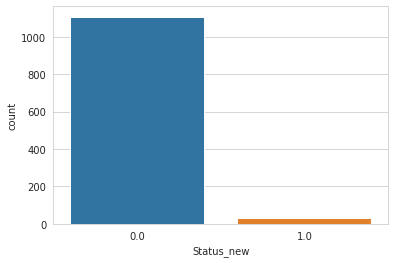

In [0]:
sns.set_style('whitegrid')
sns.countplot(x = 'Status_new', data = nonoperating)

In [0]:
nonoperating.sample(5)

,OrganizationName,OrganizationNameURL,Industries,HeadquartersLocation,Description,CBRank(Organization),EstimatedRevenueRange,OperatingStatus,FoundedDate,FoundedDatePrecision,ClosedDate,CompanyType,NumberofArticles,FullDescription,IndustryGroups,NumberofFounders,NumberofEmployees,NumberofFundingRounds,FundingStatus,LastFundingDate,LastFundingAmount,LastFundingAmountCurrency,LastFundingAmountCurrency(inUSD),LastEquityFundingAmount,LastEquityFundingAmountCurrency,LastEquityFundingAmountCurrency(inUSD),LastEquityFundingType,TotalEquityFundingAmount,TotalEquityFundingAmountCurrency,TotalEquityFundingAmountCurrency(inUSD),TotalFundingAmount,TotalFundingAmountCurrency,TotalFundingAmountCurrency(inUSD),NumberofInvestors,NumberofLeadInvestors,Top5Investors,NumberofAcquisitions,AcquisitionStatus,IPOStatus,TrendScore(7Days),TrendScore(30Days),TrendScore(90Days),SimilarWeb-MonthlyVisits,SimilarWeb-AverageVisits(6months),SimilarWeb-MonthlyRankChange(#),SimilarWeb-MonthlyRankGrowth,BuiltWith-ActiveTechCount,IPqwery-PatentsGranted,Status_new
4797,Lytro,https://www.crunchbase.com/organization/lytro,"Film, Hardware, Photography, Software, Video, ...","Mountain View, California, United States",Lytro is the imaging startup that began as a ...,"10,787",NaN,Closed,1/1/06,year,3/28/18,For Profit,864,Lytro is building the worldâs most powerful ...,"Content and Publishing, Hardware, Media and En...",1.0,101-250,7,Late Stage Venture,2017-02-15,60000000.0,USD,60000000.0,60000000.0,USD,60000000.0,Series D,215750000.0,USD,215750000.0,215750000.0,USD,215750000.0,17.0,5.0,"Andreessen Horowitz, New Enterprise Associates...",1.0,Made Acquisitions,Private,1.6,2.1,-0.2,977,"2,204.12","4,643,472",91.86%,21.0,1.0,0.0
9112,Whirl,https://www.crunchbase.com/organization/whirl,"Mobile Payments, Point of Sale","South San Francisco, California, United States",Whirl Pay instantly with your fingerprint.,"56,699",$1M to $10M,Closed,5/7/14,day,1/1/19,For Profit,NaN,Whirl's proprietary payment terminal allows cu...,"Commerce and Shopping, Financial Services, Mob...",3.0,10-Jan,2,Seed,2015-09-01,375000.0,USD,375000.0,375000.0,USD,375000.0,Angel,495000.0,USD,495000.0,495000.0,USD,495000.0,3.0,NaN,"Y Combinator, Wei Guo, venture / science",NaN,NaN,Private,0.2,1.3,0.8,NaN,NaN,NaN,NaN,3.0,NaN,0.0
739,Awear,https://www.crunchbase.com/organization/awear,"Mobile, Wearables","Campbell, California, United States",Awear enables instant communication from your ...,"78,649",NaN,Closed,1/1/13,year,NaN,For Profit,3,The average person spends over three hours on ...,"Consumer Electronics, Hardware, Mobile",2.0,10-Jan,2,Seed,2014-10-15,550000.0,USD,550000.0,550000.0,USD,550000.0,Angel,550000.0,USD,550000.0,650000.0,USD,650000.0,2.0,NaN,"Streamlined Ventures, 9+ Program",NaN,NaN,Private,0.1,1.2,0.1,NaN,146.79,NaN,NaN,3.0,NaN,0.0
1479,Chameleon Systems,https://www.crunchbase.com/organization/chamel...,"Network Hardware, Semiconductor","San Jose, California, United States","Chameleon Systems designs, markets and sells p...","338,310",NaN,Closed,1/1/97,year,1/1/03,For Profit,NaN,Chameleon Systems is a privately held fabless ...,"Hardware, Science and Engineering",NaN,51-100,4,Late Stage Venture,2001-02-05,47000000.0,USD,47000000.0,47000000.0,USD,47000000.0,Series C,73700000.0,USD,73700000.0,73700000.0,USD,73700000.0,14.0,3.0,"Convergence Partners, Synopsys, Merrill Lynch,...",NaN,NaN,Private,0.0,-0.4,0.1,NaN,NaN,NaN,NaN,20.0,NaN,0.0
7497,Shyp,https://www.crunchbase.com/organization/shyp,"Delivery, Logistics, Shipping","San Francisco, California, United States",Shyp provides shipping services that ranges fr...,"5,937",NaN,Closed,7/1/13,day,3/27/18,For Profit,347,Shyp is the easiest way to ship your stuff. A ...,"Administrative Services, Transportation",3.0,Nov-50,3,Early Stage Venture,2015-04-21,50000000.0,USD,50000000.0,50000000.0,USD,50000000.0,Series B,62100000.0,USD,62100000.0,62100000.0,USD,62100000.0,34.0,2.0,"Kleiner Perkins, Homebrew, Slow Ventures, Desi...",NaN,NaN,Private,0.7,-0.3,-0

In [0]:
operating.shape

(8584, 48)

In [0]:
nonoperating.shape

(1140, 49)

In [0]:
frames = [operating, nonoperating]

In [0]:
final = pd.concat(frames)

In [0]:
final.shape

(9724, 49)

In [0]:
final.Status_new.value_counts()

0.0    1107
1.0      33
Name: Status_new, dtype: int64

In [0]:
final.OperatingStatus.value_counts()

Active    8584
Closed    1140
Name: OperatingStatus, dtype: int64

In [0]:
final.head()

,OrganizationName,OrganizationNameURL,Industries,HeadquartersLocation,Description,CBRank(Organization),EstimatedRevenueRange,OperatingStatus,FoundedDate,FoundedDatePrecision,ClosedDate,CompanyType,NumberofArticles,FullDescription,IndustryGroups,NumberofFounders,NumberofEmployees,NumberofFundingRounds,FundingStatus,LastFundingDate,LastFundingAmount,LastFundingAmountCurrency,LastFundingAmountCurrency(inUSD),LastEquityFundingAmount,LastEquityFundingAmountCurrency,LastEquityFundingAmountCurrency(inUSD),LastEquityFundingType,TotalEquityFundingAmount,TotalEquityFundingAmountCurrency,TotalEquityFundingAmountCurrency(inUSD),TotalFundingAmount,TotalFundingAmountCurrency,TotalFundingAmountCurrency(inUSD),NumberofInvestors,NumberofLeadInvestors,Top5Investors,NumberofAcquisitions,AcquisitionStatus,IPOStatus,TrendScore(7Days),TrendScore(30Days),TrendScore(90Days),SimilarWeb-MonthlyVisits,SimilarWeb-AverageVisits(6months),SimilarWeb-MonthlyRankChange(#),SimilarWeb-MonthlyRankGrowth,BuiltWith-ActiveTechCount,IPqwery-PatentsGranted,Status_new
0,'nuffsaid,https://www.crunchbase.com/organization/nuffsaid,NaN,"Palo Alto, California, United States",A smart space for your work apps,"4,387",NaN,Active,5/29/19,day,NaN,For Profit,NaN,ânuffsaid is a workflow intelligence platfor...,NaN,3.0,Nov-50,1,Seed,2020-02-11,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,Seed,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,6.0,2.0,"General Catalyst, Gradient Ventures, Global Fo...",NaN,NaN,Private,-0.8,1.2,10.0,"11,674","4,406.64","44,034",2.76%,25.0,NaN,NaN
1,/dev/color,https://www.crunchbase.com/organization/dev-color,"Information Technology, Non Profit, Software","Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"68,577",$1M to $10M,Active,5/1/15,month,NaN,For Profit,NaN,/dev/color is a non-profit organization that a...,"Information Technology, Software",1.0,10-Jan,1,Seed,2016-08-24,120000.0,USD,120000.0,120000.0,USD,120000.0,Seed,120000.0,USD,120000.0,120000.0,USD,120000.0,1.0,NaN,Y Combinator,NaN,NaN,Private,-0.3,-0.3,-0.3,"7,266","25,482.11","-154,302",-7.76%,40.0,NaN,NaN
2,0Chain,https://www.crunchbase.com/organization/0chain,"Blockchain, Cyber Security, Data Storage","San Jose, California, United States",0Chain is a blockchain-secure data protection ...,"19,974",NaN,Active,7/1/17,month,NaN,For Profit,NaN,0Chain is a blockchain-secure data protection ...,"Hardware, Information Technology, Privacy and ...",1.0,10-Jan,3,Seed,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,Seed,5850000.0,USD,5850000.0,5850000.0,USD,5850000.0,NaN,NaN,NaN,NaN,NaN,Private,-0.1,-0.9,2.5,"1,679","1,485.31","-5,666,099",-50.48%,8.0,0.0,NaN
3,100AM,https://www.crunchbase.com/organization/100and...,"Apps, Business Information Systems, Events, In...","Redwood City, California, United States",Uber for event attendees,"49,773",NaN,Active,1/19/16,day,NaN,For Profit,NaN,100AM brings more valuable contacts = increase...,"Apps, Events, Hardware, Information Technology...",2.0,NaN,2,Seed,2018-07-10,130000.0,USD,130000.0,130000.0,USD,130000.0,Pre-Seed,730000.0,USD,730000.0,730000.0,USD,730000.0,1.0,1.0,Starta Accelerator,NaN,NaN,Private,0.8,2.0,1.2,394,"1,454.91","3,423,576",36.47%,41.0,0.0,NaN
4,101 Islands LLC,https://www.crunchbase.com/organization/101-is...,"Apps, Consumer Applications, Information Techn...","San Jose, California, United States",Patented GROTU mobile app (iOS & Android) for ...,"20,127",NaN,Active,2/24/17,day,NaN,For Profit,11,GROTU - Our patented mobile app is FREE to dow...,"Apps, Information Technology, Media and Entert...",1.0,10-Jan,1,Seed,2017-02-24,200000.0,USD,200000.0,200000.0,USD,200000.0,Pre-Seed,200000.0,USD,200000.0,200000.0,USD,200000.0,1.0,1.0,Sunmeet Jolly,NaN,NaN,Private,-0.4,3.0,1.4,NaN,182.84,NaN,NaN,21.0,NaN,NaN


In [0]:
# Status_new '2' = Active 
final["Status_new"].fillna("2", inplace = True)

In [0]:
final.head()

,OrganizationName,OrganizationNameURL,Industries,HeadquartersLocation,Description,CBRank(Organization),EstimatedRevenueRange,OperatingStatus,FoundedDate,FoundedDatePrecision,ClosedDate,CompanyType,NumberofArticles,FullDescription,IndustryGroups,NumberofFounders,NumberofEmployees,NumberofFundingRounds,FundingStatus,LastFundingDate,LastFundingAmount,LastFundingAmountCurrency,LastFundingAmountCurrency(inUSD),LastEquityFundingAmount,LastEquityFundingAmountCurrency,LastEquityFundingAmountCurrency(inUSD),LastEquityFundingType,TotalEquityFundingAmount,TotalEquityFundingAmountCurrency,TotalEquityFundingAmountCurrency(inUSD),TotalFundingAmount,TotalFundingAmountCurrency,TotalFundingAmountCurrency(inUSD),NumberofInvestors,NumberofLeadInvestors,Top5Investors,NumberofAcquisitions,AcquisitionStatus,IPOStatus,TrendScore(7Days),TrendScore(30Days),TrendScore(90Days),SimilarWeb-MonthlyVisits,SimilarWeb-AverageVisits(6months),SimilarWeb-MonthlyRankChange(#),SimilarWeb-MonthlyRankGrowth,BuiltWith-ActiveTechCount,IPqwery-PatentsGranted,Status_new
0,'nuffsaid,https://www.crunchbase.com/organization/nuffsaid,NaN,"Palo Alto, California, United States",A smart space for your work apps,"4,387",NaN,Active,5/29/19,day,NaN,For Profit,NaN,ânuffsaid is a workflow intelligence platfor...,NaN,3.0,Nov-50,1,Seed,2020-02-11,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,Seed,4300000.0,USD,4300000.0,4300000.0,USD,4300000.0,6.0,2.0,"General Catalyst, Gradient Ventures, Global Fo...",NaN,NaN,Private,-0.8,1.2,10.0,"11,674","4,406.64","44,034",2.76%,25.0,NaN,2
1,/dev/color,https://www.crunchbase.com/organization/dev-color,"Information Technology, Non Profit, Software","Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"68,577",$1M to $10M,Active,5/1/15,month,NaN,For Profit,NaN,/dev/color is a non-profit organization that a...,"Information Technology, Software",1.0,10-Jan,1,Seed,2016-08-24,120000.0,USD,120000.0,120000.0,USD,120000.0,Seed,120000.0,USD,120000.0,120000.0,USD,120000.0,1.0,NaN,Y Combinator,NaN,NaN,Private,-0.3,-0.3,-0.3,"7,266","25,482.11","-154,302",-7.76%,40.0,NaN,2
2,0Chain,https://www.crunchbase.com/organization/0chain,"Blockchain, Cyber Security, Data Storage","San Jose, California, United States",0Chain is a blockchain-secure data protection ...,"19,974",NaN,Active,7/1/17,month,NaN,For Profit,NaN,0Chain is a blockchain-secure data protection ...,"Hardware, Information Technology, Privacy and ...",1.0,10-Jan,3,Seed,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,Seed,5850000.0,USD,5850000.0,5850000.0,USD,5850000.0,NaN,NaN,NaN,NaN,NaN,Private,-0.1,-0.9,2.5,"1,679","1,485.31","-5,666,099",-50.48%,8.0,0.0,2
3,100AM,https://www.crunchbase.com/organization/100and...,"Apps, Business Information Systems, Events, In...","Redwood City, California, United States",Uber for event attendees,"49,773",NaN,Active,1/19/16,day,NaN,For Profit,NaN,100AM brings more valuable contacts = increase...,"Apps, Events, Hardware, Information Technology...",2.0,NaN,2,Seed,2018-07-10,130000.0,USD,130000.0,130000.0,USD,130000.0,Pre-Seed,730000.0,USD,730000.0,730000.0,USD,730000.0,1.0,1.0,Starta Accelerator,NaN,NaN,Private,0.8,2.0,1.2,394,"1,454.91","3,423,576",36.47%,41.0,0.0,2
4,101 Islands LLC,https://www.crunchbase.com/organization/101-is...,"Apps, Consumer Applications, Information Techn...","San Jose, California, United States",Patented GROTU mobile app (iOS & Android) for ...,"20,127",NaN,Active,2/24/17,day,NaN,For Profit,11,GROTU - Our patented mobile app is FREE to dow...,"Apps, Information Technology, Media and Entert...",1.0,10-Jan,1,Seed,2017-02-24,200000.0,USD,200000.0,200000.0,USD,200000.0,Pre-Seed,200000.0,USD,200000.0,200000.0,USD,200000.0,1.0,1.0,Sunmeet Jolly,NaN,NaN,Private,-0.4,3.0,1.4,NaN,182.84,NaN,NaN,21.0,NaN,2


In [0]:
#Status_new 0= Closed
#Status_new 1= aqcquired/IPO
#Status_new 2= Active
final.Status_new.value_counts()

2      8584
0.0    1107
1.0      33
Name: Status_new, dtype: int64

In [0]:
#final.to_csv(r'Desktop/dataframe.csv', index = False, header=True)
from google.colab import files
final.to_csv('NEWdata.csv') 
files.download('NEWdata.csv')

#**Feature_Selector**

In [0]:
#pip install feature-selector

In [0]:
from feature_selector import FeatureSelector

In [0]:
train_labels = final['Status_new']

In [0]:
fs = FeatureSelector(data = final, labels = train_labels)

In [0]:
fs.identify_missing(missing_threshold=0.6)

In [0]:
missing_features = fs.ops['missing']
missing_features[:10]

['ClosedDate',
 'NumberofAcquisitions',
 'AcquisitionStatus',
 'IPqwery-PatentsGranted']

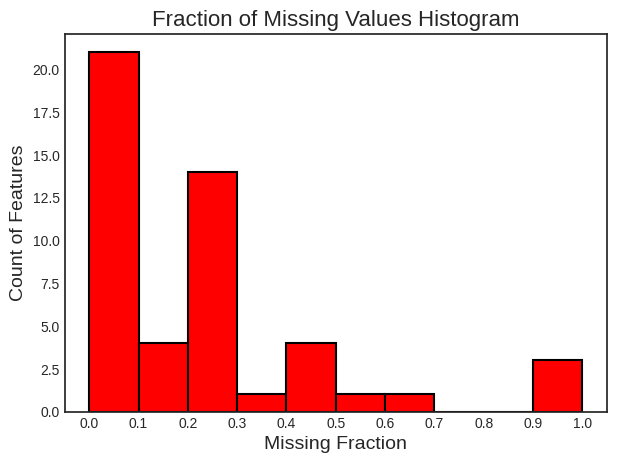

In [0]:
fs.plot_missing()


In [0]:
fs.missing_stats.head(10)

,missing_fraction
AcquisitionStatus,0.948581
NumberofAcquisitions,0.948581
ClosedDate,0.939840
IPqwery-PatentsGranted,0.639860
NumberofLeadInvestors,0.522316
EstimatedRevenueRange,0.487968
SimilarWeb-MonthlyRankGrowth,0.432127
SimilarWeb-MonthlyRankChange(#),0.432127
NumberofArticles,0.412382
SimilarWeb-MonthlyVisits,0.383484


In [0]:
fs.identify_collinear(correlation_threshold=0.675)


7 features with a correlation magnitude greater than 0.68.



In [0]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['LastFundingAmountCurrency(inUSD)',
 'LastEquityFundingAmount',
 'LastEquityFundingAmountCurrency(inUSD)',
 'TotalEquityFundingAmount',
 'TotalEquityFundingAmountCurrency(inUSD)']

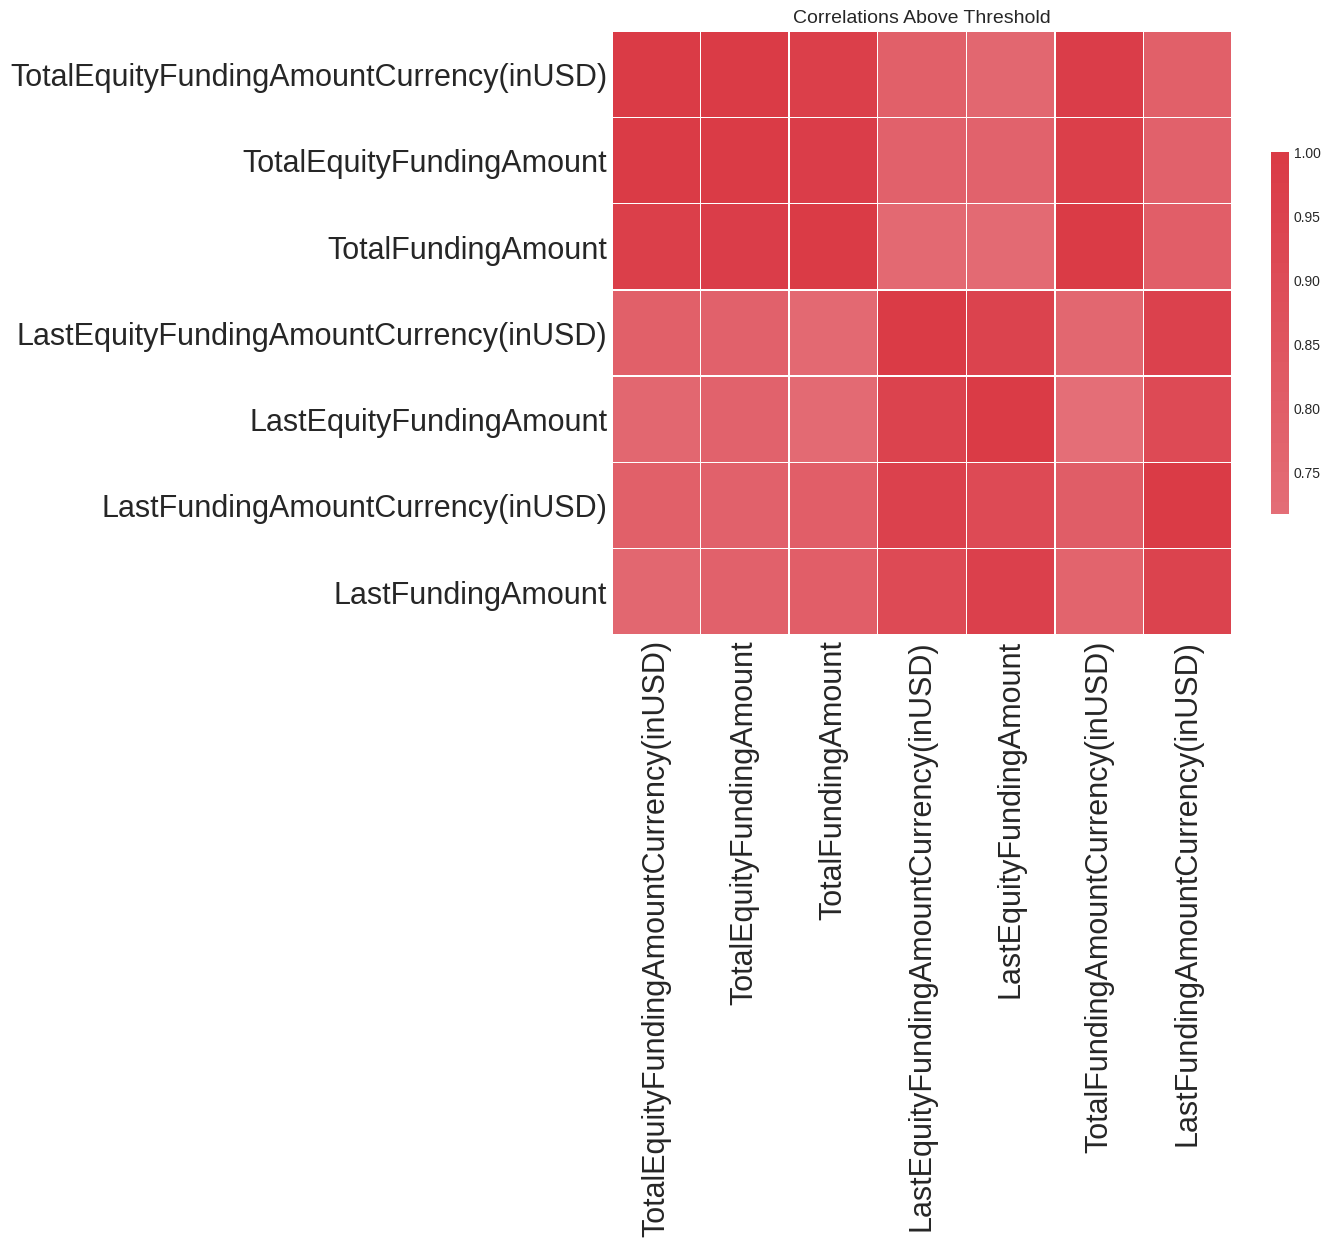

In [0]:
fs.plot_collinear()

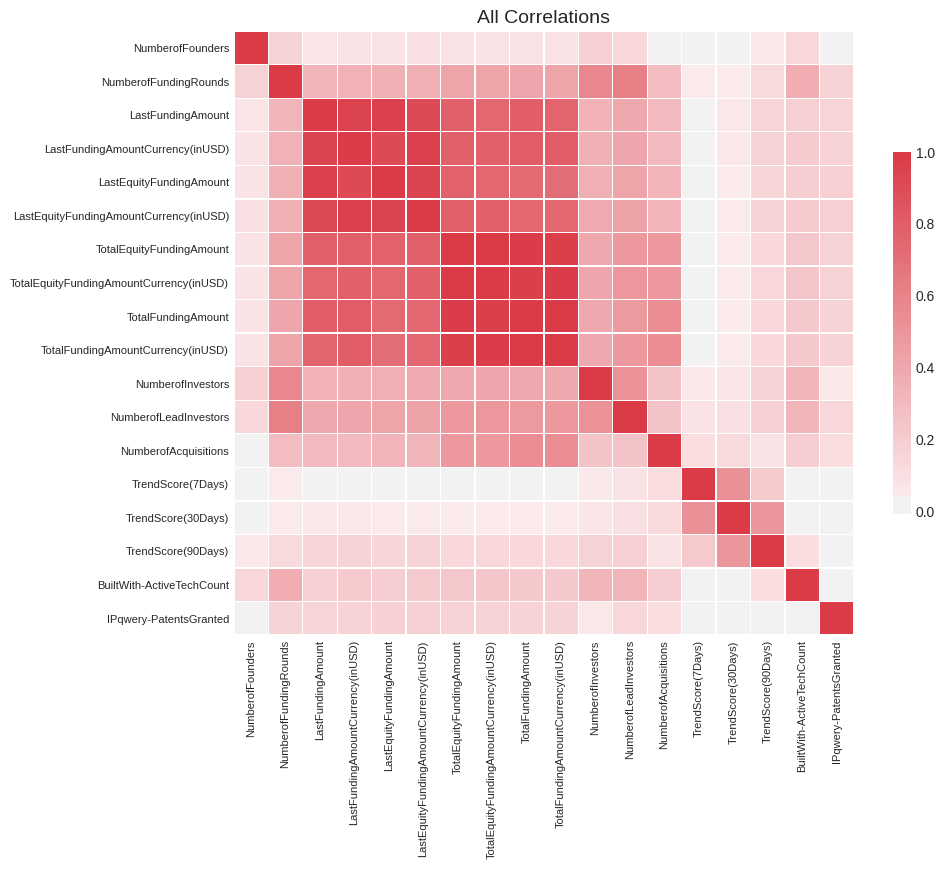

In [0]:
fs.plot_collinear(plot_all=True)

8 features with a correlation magnitude greater than 0.60.



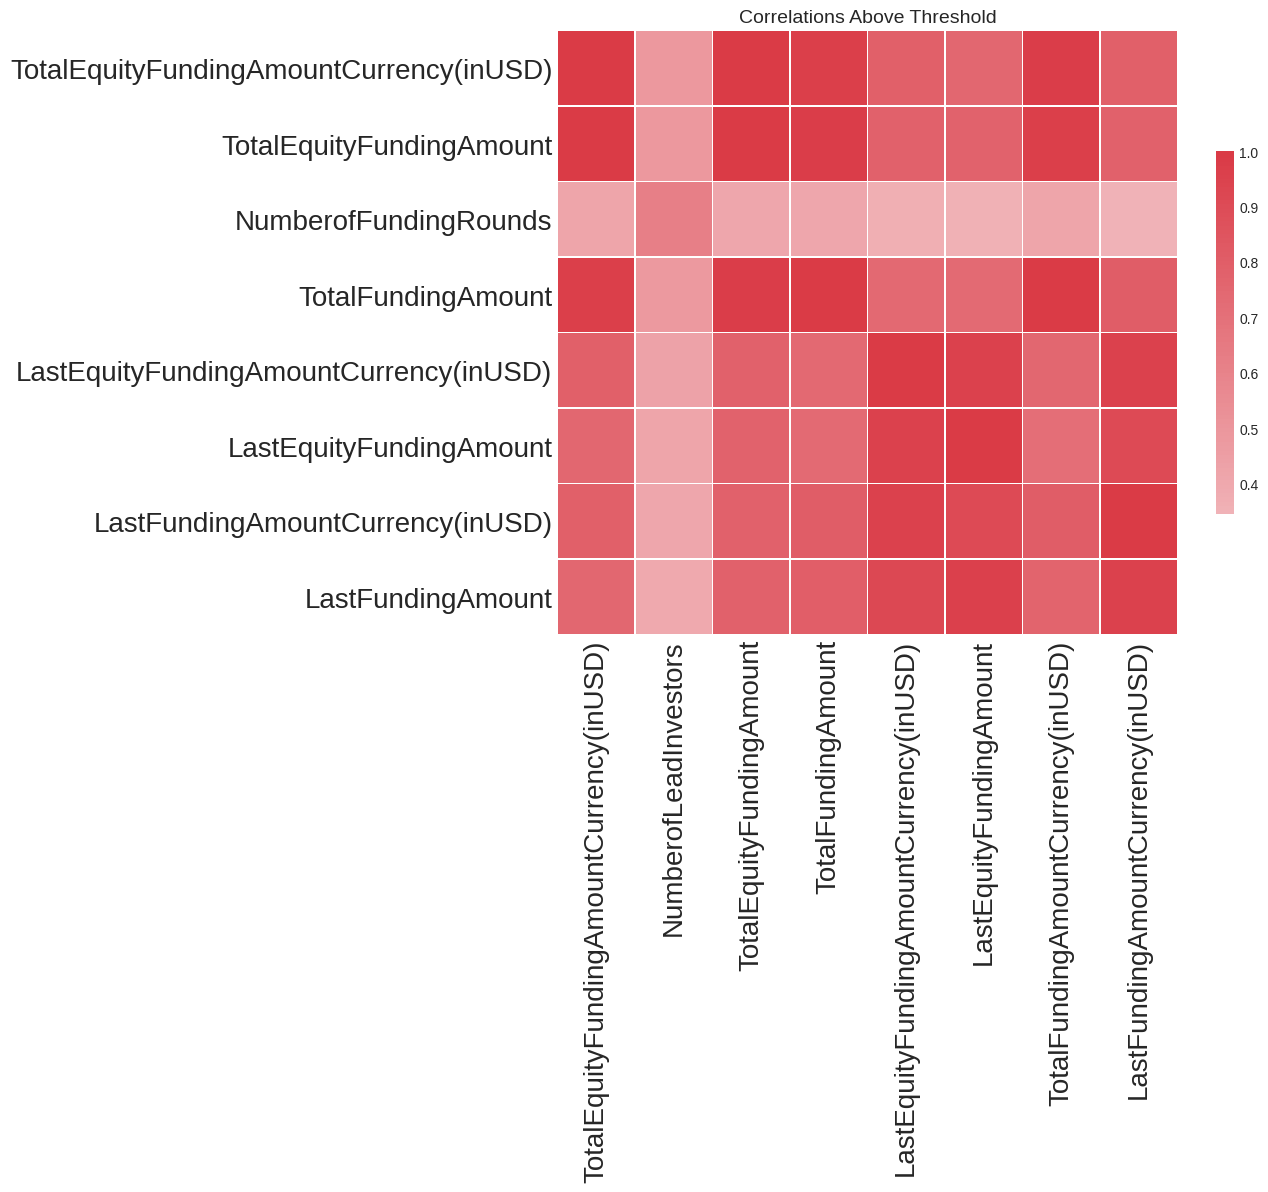

In [0]:
fs.identify_collinear(correlation_threshold=0.6)
fs.plot_collinear()

In [0]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,LastFundingAmountCurrency(inUSD),LastFundingAmount,0.952437
1,LastEquityFundingAmount,LastFundingAmount,0.962026
2,LastEquityFundingAmount,LastFundingAmountCurrency(inUSD),0.910303
3,LastEquityFundingAmountCurrency(inUSD),LastFundingAmount,0.913198
4,LastEquityFundingAmountCurrency(inUSD),LastFundingAmountCurrency(inUSD),0.958295
